# Objectives

- Assessing the accuracy of the coefficients 
- Feature Selection
- Understanding the accuracy of the model
- qq-plots and residuals

In [1]:
import matplotlib.pyplot as plt

import numpy as np

## use statsmodel to fit a line to the data
import statsmodels.api as sm

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv', index_col = 0 )

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


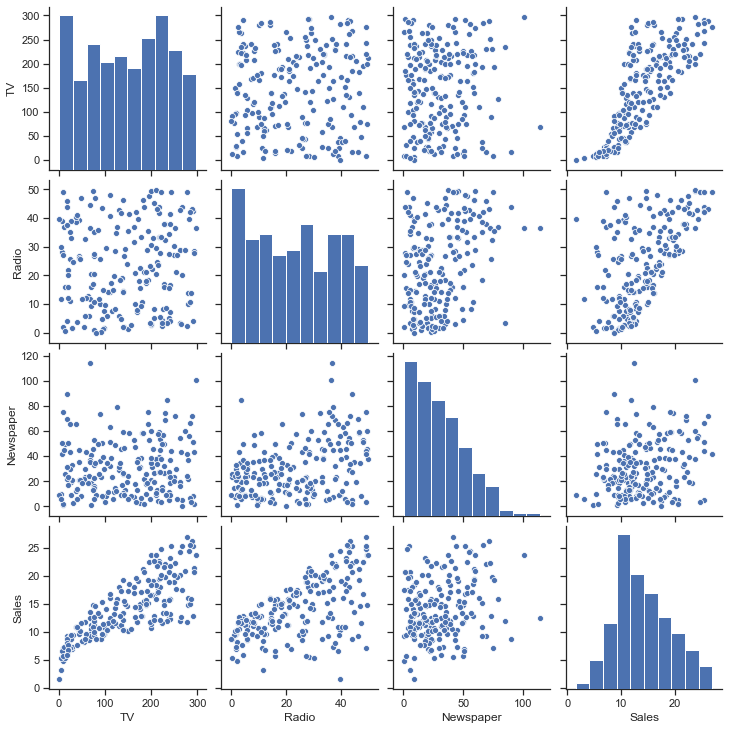

In [3]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)
plt.show()

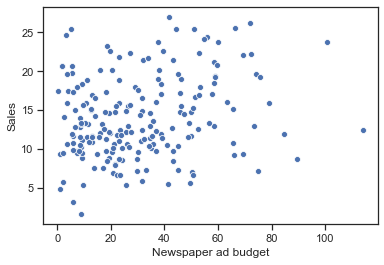

In [4]:
## let's plot df

sns.scatterplot(df['Newspaper'], df['Sales'])

plt.xlabel('Newspaper ad budget')

plt.ylabel('Sales')
plt.show()

In [5]:
X = df.Newspaper
y = df.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 09 Jan 2020   Prob (F-statistic):            0.00115
Time:                        09:43:44   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


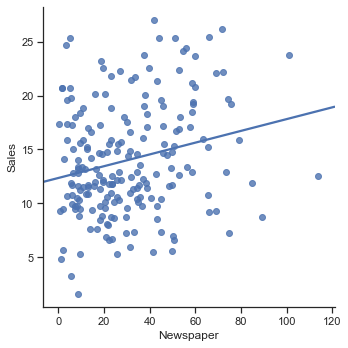

In [36]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df, ci = 0);

## Assessing the Accuracy of the Model
When we assess the accuracy of the coefficients basically we check whether there is a real relationship between X and y. After we concluded that there is a significant relationship between variables it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using the $R^{2}$ statistic. 

## $R^{2}$ statistic

Recall that we can find 'the best' line so that the _Residual Sum of Squares_ (RSS) is minimized:


<img src="rss.png" cap="RSS"  width='550'/>


We will assess the accuracy of the model by comparing this with the Total Sum of Squares (TSS):

$$ TSS = \sum\limits_{i=1}^{N} (y_{i} - \bar{y}) $$


TSS measures the total variance in the response Y , and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.



Hence, TSS − RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^{2}$ measures the proportion of variability in Y that can be explained using X.

<img src="rsquared.png" cap="RSS"  width='250'/>

# Multiple Linear Regression

- When we have more than one variable our linear model will look like as:

$$ Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon$$


__Notation:__

- $X_{1}, \cdots, X_{p}$ :  Columns of the dataset (or features or predictors or independent variables)

- $Y$ : target column in the dataset (or target variable or dependent variable)

- $\epsilon$ : Irreducible error.

__Goal:__ Given a dataset $X$ we would like to find estimates $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$ from this data (sample) for the (population) parameters $\beta_{0}, \cdots, \beta_{p}$

- Once $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$  are given, then we can make predictions for new observations:

$$ \hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{1} +\hat{\beta}_{2}x_{2} + \cdots \hat{\beta}_{p}x_{p} $$

for a given observation (sample or row) $x = [x_{1}, \cdots, x_{p}]$

- Cost function (objective function) become:

\begin{align}
RSS &= \sum\limits_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} \\
&= \sum\limits_{i=1}^{n} (y_{i} - \hat{\beta}_{0} - \hat{\beta}_{1} x_{i1}  - \hat{\beta}_{2}x_{i2} - \cdots  - \hat{\beta}_{p}x_{ip})^{2}
\end{align}

__Your Turn!__

Use statsmodel to fit a linear model with all the features except 'Sale' which was target variable.

In [37]:
# %load -r 1-6 supplement.py


Compare the results from statsmodel with sklearn

In [39]:
# %load -r 9-22 supplement.py

__Q1:__ Why do we initially get a statistically significant result for the relation between Sales and Newspaper but in the multiple case model tell us that relation is not significant?

In [71]:
## note that There is a correlation between Newspaper and Radio
## This reveals a tendency to spend more on newspaper advertising 
## in markets where more is spent on radio advertising. 

df[features].corr()

,TV,Newspaper,Radio
TV,1.000000,0.056648,0.054809
Newspaper,0.056648,1.000000,0.354104
Radio,0.054809,0.354104,1.000000


__Q2:__ Is at least one of the variables 'TV', 'Newspaper', 'Radio' significantly explains 'Sales'?

__A2:__ This is answered by F-statistics:

$$ F = \frac{(\text{TSS - RSS})/p}{\text{RSS}/(n-p-1)}$$

Note that we expect that this F is bigger than 1. 

[check F-distribution](https://en.wikipedia.org/wiki/F-distribution#/media/File:F-distribution_pdf.svg)


__Q3:__ We know that some of the p_values are significant why do we still have to check F-statistics?

__A3:__ Hint: Multiple comparison problem


__Q4:__ How do we choose important variables

- Straight forward selection: try all possible combination with variables and use AIC, BIC etc to choose best.

- Forward selection:

    1. Start with null model
    2. Then one linear model for each separate variables
    3. Pick the variable with lowest RSS
    4. We then add to that model the variable that results variable selection 
    in the lowest RSS for the new two-variable model.
    5. Repeat this until a stoppage criteria is achieved.
- Backward selection

- Mixed Selection

## Diagnosis: Residuals and QQ-plots

In [21]:
## let's see the results one more time
X = df[features]
y = df.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        10:21:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


__Your Turn!__

Recall that we initially assumed that the errors should be normally distributed with mean zero and fixed variance. 

__Q:__ Find the residuals and check their distribution.

(array([ 1.,  0.,  0.,  3.,  7., 19., 24., 61., 62., 23.]),
 array([-8.8276871 , -7.66199613, -6.49630516, -5.33061419, -4.16492322,
        -2.99923225, -1.83354128, -0.66785031,  0.49784066,  1.66353163,
         2.8292226 ]),
 <a list of 10 Patch objects>)

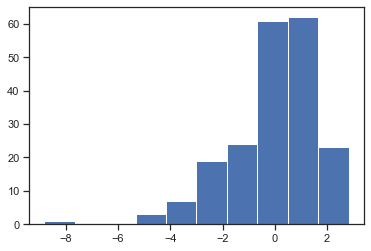

In [22]:
# %load -r 24-26 supplement.py
from scipy.stats import stats
residuals = res.resid
plt.hist(residuals)

In [1]:
import numpy as np

In [23]:
sample_1 = np.random.normal(loc= 0, scale = 5, size = 30)


In [24]:
sample_1.sort()

In [25]:
np.quantile(sample_1, q = 0.01)

-10.807077337698505

In [26]:
import scipy.stats as stats

In [27]:
stats.norm.ppf(loc = 0, scale = 1, q=0.0)

-inf

In [28]:
np.quantile(sample_1, q= 0)

-11.65141320194608

In [29]:
x_list = []
y_list = []
for q in np.linspace(0.001,1, 100):
        x_list.append(np.quantile(sample_1, q = q))
        y_list.append(stats.norm.ppf(loc = 0, scale = 1, q=q))

In [30]:
import matplotlib.pyplot as plt

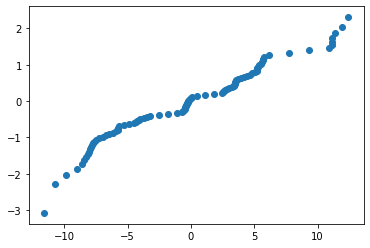

In [31]:
plt.scatter(x_list, y_list)

In [23]:
# %load -r 28 supplement.py
stats.normaltest(residuals)

NormaltestResult(statistic=60.41395945525527, pvalue=7.608085583222715e-14)

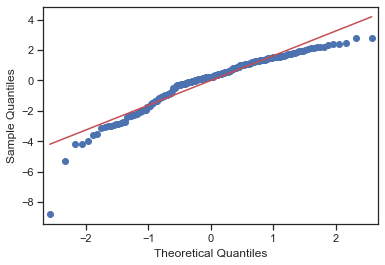

In [24]:
fig = sm.qqplot(residuals, line = 'r')
plt.show()

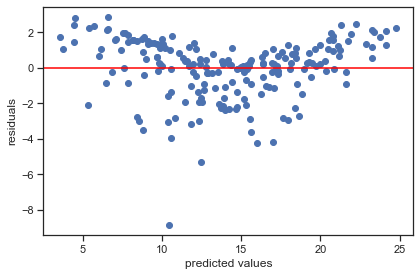

In [27]:
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()